In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("input_bcell.csv")
data

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [ ]:
len(data)

14387

In [ ]:
data.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10faf06b10>,
      dtype=object)

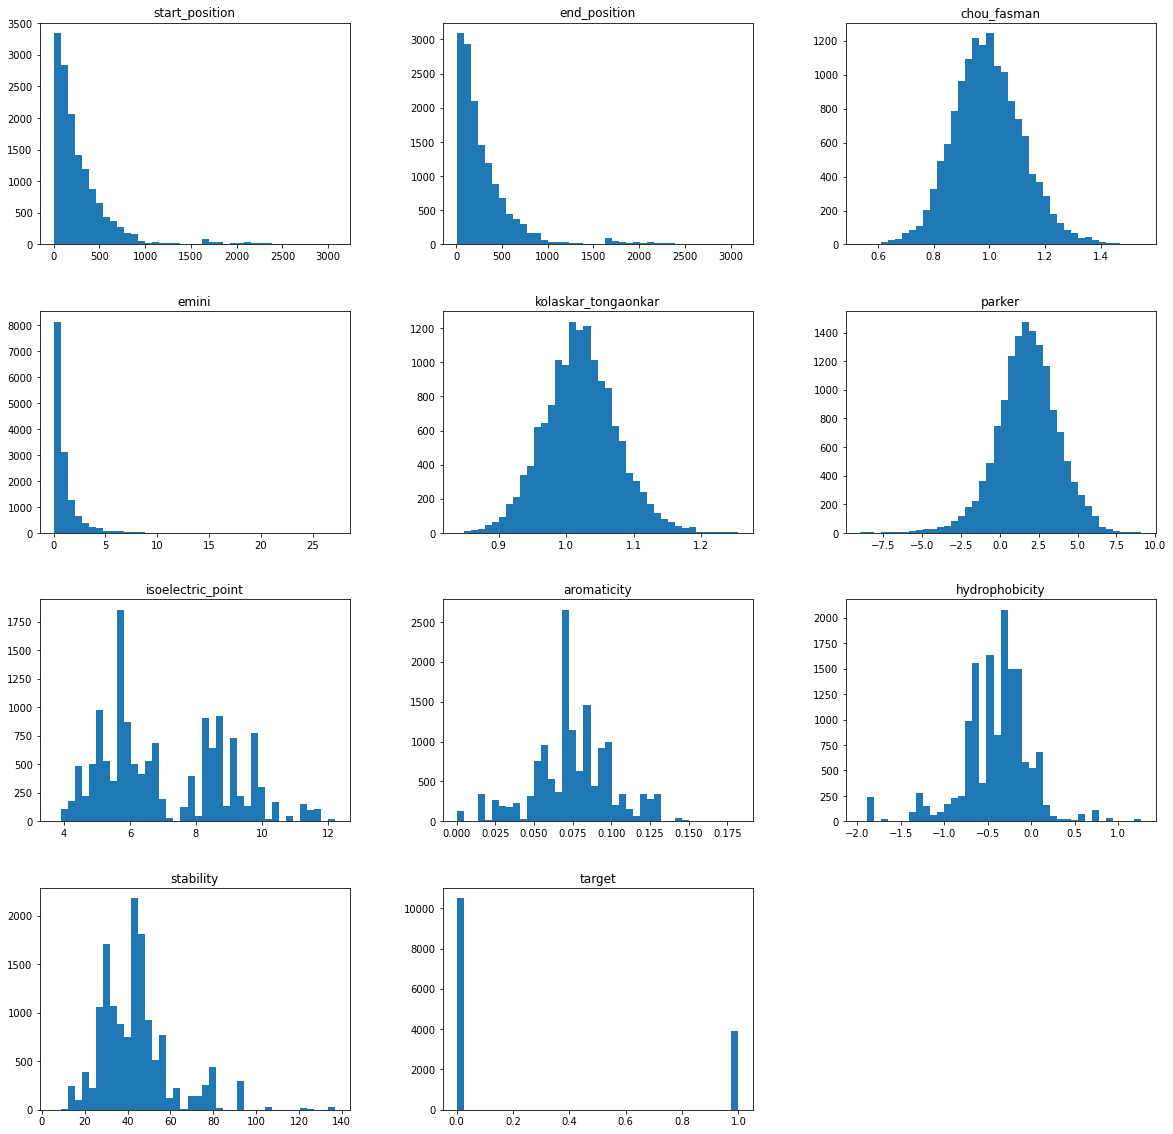

In [ ]:
data.hist(grid=False, figsize=(20, 20), bins=40)

<BarContainer object of 2 artists>

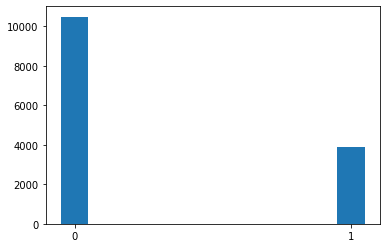

In [ ]:
zero, um = data['target'].value_counts()

qtde = np.array([zero, um])
elementos = np.array(['0', '1'])

plt.bar(elementos, qtde, width=0.1)

In [ ]:
data['target'].value_counts()

0    10485
1     3902
Name: target, dtype: int64

In [ ]:
data.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
mean,297.675818,308.085077,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902,0.271217
std,353.741450,353.733297,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362,0.444603
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,84.000000,95.000000,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529,0.000000
50%,191.000000,200.000000,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268,0.000000
75%,382.000000,393.000000,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,27.189000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


In [ ]:
data.describe(include='all')

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14387,14387,14387.000000,14387.000000,14387,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000,14387.000000
unique,760,757,NaN,NaN,14362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,P10155,MEESVNQMQPLNEKQIANSQDGYVWQVTDMNRLHRFLCFGSEGGTY...,NaN,NaN,ARDVLAVVSK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,560,560,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.675818,308.085077,NaN,0.994706,1.059788,1.021188,1.767137,7.067472,0.075727,-0.406097,43.703902,0.271217
std,NaN,NaN,353.741450,353.733297,NaN,0.124772,1.621931,0.053804,1.968985,1.888708,0.025767,0.394618,16.682362,0.444603
min,NaN,NaN,1.000000,6.000000,NaN,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,NaN,NaN,84.000000,95.000000,NaN,0.911000,0.248000,0.986000,0.600000,5.621033,0.060606,-0.606215,31.614529,0.000000
50%,NaN,NaN,191.000000,200.000000,NaN,0.990000,0.556000,1.020000,1.793000,6.499573,0.074534,-0.330540,42.287268,0.000000
75%,NaN,NaN,382.000000,393.000000,NaN,1.074000,1.209000,1.055000,3.009500,8.676575,0.091312,-0.189591,49.101172,1.000000


In [ ]:
def length(col):
    new = []
    for i in col:
        new.append(len(i))
    return new

In [ ]:
data['peptide_seq'] =length(data['peptide_seq'])
data['protein_seq'] = length(data['protein_seq'])

In [ ]:
data

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,397,161,165,5,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,336,251,255,5,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,207,145,149,5,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,1005,152,156,5,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,260,85,89,5,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,739,177,191,15,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,739,285,299,15,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,739,189,203,15,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,1669,1479,1493,15,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [ ]:
data['peptide_seq'].value_counts()

15    4611
10    3747
8     2149
12    1185
9     1132
13     465
7      318
14     276
6      265
11     165
5       74
Name: peptide_seq, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

In [ ]:
features = ["protein_seq", "peptide_seq", "chou_fasman","emini","kolaskar_tongaonkar","parker","isoelectric_point","aromaticity","hydrophobicity","stability"]

In [ ]:
x = data[features]
y = data['target']

In [ ]:
x.head()

,protein_seq,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,397,5,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300
1,336,5,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512
2,207,5,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333
3,1005,5,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373
4,260,5,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=1)

In [ ]:
print("Number instances in features_train dataset: ", x_train.shape)
print("Number instances in Output_train dataset: ", y_train.shape)
print("Number instances in features_test dataset: ", x_test.shape)
print("Number instances in Output_test dataset: ", y_test.shape)

Number instances in features_train dataset:  (9639, 10)
Number instances in Output_train dataset:  (9639,)
Number instances in features_test dataset:  (4748, 10)
Number instances in Output_test dataset:  (4748,)


In [ ]:
print("Before OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of No-Recurrent Class '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of Recurrent Class '1': 2617
Before OverSampling, counts of No-Recurrent Class '0': 7022 



In [ ]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


print('After OverSampling, the shape of features_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of Output_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of Recurrent Class '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of features_X: (14044, 10)
After OverSampling, the shape of Output_y: (14044,) 

After OverSampling, counts of Recurrent Class '1': 7022
After OverSampling, counts of Non-Recurrent Class '0': 7022


In [ ]:
#1.Decision Tree Classifier
classifierTree = DecisionTreeClassifier()

#2.Support Vector Classification
classifierSVC = SVC(probability=True)

#3.Random Forest
classifierRandomForest = RandomForestClassifier()
classifierTree.fit(x_train_res, y_train_res)
classifierSVC.fit(x_train_res, y_train_res)
classifierRandomForest.fit(x_train_res, y_train_res)

ModelPredictionsTree = classifierTree.predict(x_test)
ModelPredictionsSVC = classifierSVC.predict(x_test)
ModelPredictionsRandomForest = classifierRandomForest.predict(x_test)

In [ ]:
print("Decision Tree Classifier\n")
print("Accuracy: ", accuracy_score(y_test, ModelPredictionsTree))
print("Precision: ", precision_score(y_test, ModelPredictionsTree))
print("Recall:   ", recall_score(y_test, ModelPredictionsTree))

Decision Tree Classifier

Accuracy:  0.8098146588037068
Precision:  0.6273333333333333
Recall:    0.7322957198443579


In [ ]:
print("Support Vector Classification\n")
print("Accuracy: ", accuracy_score(y_test, ModelPredictionsSVC))
print("Precision: ", precision_score(y_test, ModelPredictionsSVC))
print("Recall:   ", recall_score(y_test, ModelPredictionsSVC))

Support Vector Classification

Accuracy:  0.5958298230834035
Precision:  0.35551504102096626
Recall:    0.6070038910505836


In [ ]:
print("Random Forest\n")
print("Accuracy: ", accuracy_score(y_test, ModelPredictionsRandomForest))
print("Precision: ", precision_score(y_test, ModelPredictionsRandomForest))
print("Recall:   ", recall_score(y_test, ModelPredictionsRandomForest))

Random Forest

Accuracy:  0.8506739679865206
Precision:  0.6945945945945946
Recall:    0.8


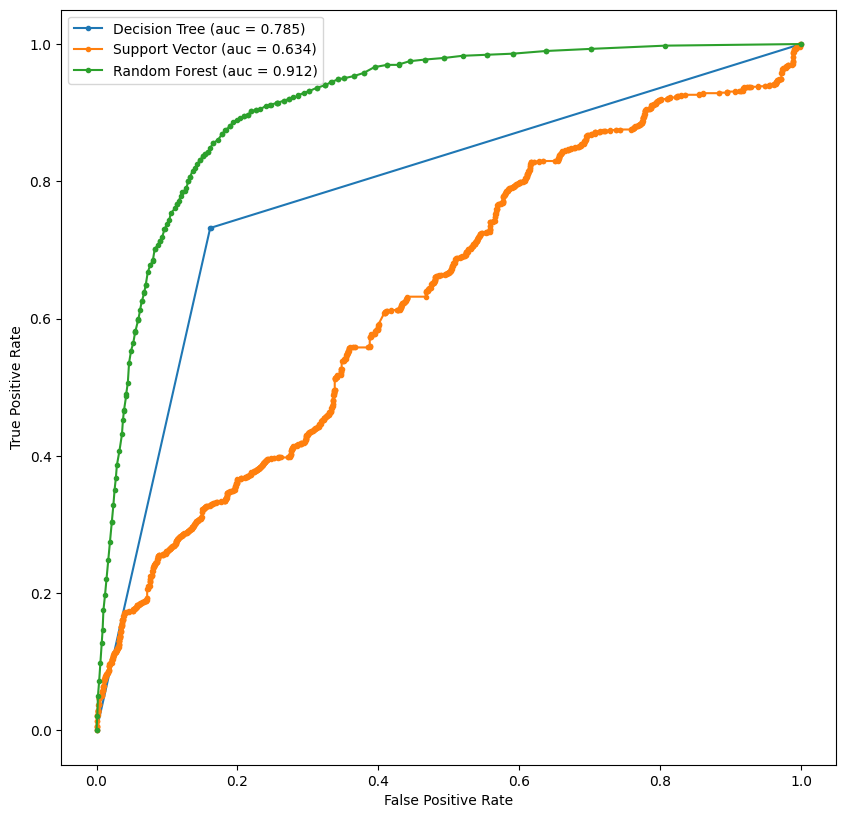

In [ ]:
import seaborn as sn
ModelPredProbTree = classifierTree.predict_proba(x_test)[::,1]
tree_fpr, tree_tpr, threshold = roc_curve(y_test, ModelPredProbTree)
auc_tree = auc(tree_fpr, tree_tpr)

ModelPredProbSVC = classifierSVC.predict_proba(x_test)[::,1]
svc_fpr, svc_tpr, threshold = roc_curve(y_test, ModelPredProbSVC)
auc_svc = auc(svc_fpr, svc_tpr)

ModelPredProbRF = classifierRandomForest.predict_proba(x_test)[::,1]
rf_fpr, rf_tpr, threshold = roc_curve(y_test, ModelPredProbRF)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 10), dpi=100)
#sns.set_style('darkgrid')
#sns.countplot(bcell_sars_df['target'],linewidth=3,palette="Set2",edgecolor='black')
plt.plot(tree_fpr, tree_tpr, marker=".", label='Decision Tree (auc = %0.3f)' % auc_tree)
plt.plot(svc_fpr, svc_tpr, marker=".", label='Support Vector (auc = %0.3f)' % auc_svc)
plt.plot(rf_fpr, rf_tpr, marker=".", label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()


In [ ]:
sars = pd.read_csv("input_sars.csv")
sars

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
516,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
517,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
518,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


In [ ]:
sars['peptide_seq'] = length(sars['peptide_seq'])
sars['protein_seq'] = length(sars['protein_seq'])

In [ ]:
sars

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,1255,1,17,17,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,1255,1,15,15,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,1255,2,10,9,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,1255,6,20,15,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,1255,9,25,17,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,AAU93319,1255,1231,1245,15,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
516,AAU93319,1255,1234,1255,22,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
517,AAU93319,1255,1236,1255,20,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
518,AAU93319,1255,1236,1250,15,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


In [ ]:
x_sars = sars[features]
y_sars = sars['target']

In [ ]:
sars_ModelPredictionsTree = classifierTree.predict(x_sars)
sars_ModelPredictionsSVC = classifierSVC.predict(x_sars)
sars_ModelPredictionsRandomForest = classifierRandomForest.predict(x_sars)

In [ ]:
print("Decision Tree Classifier\n")
print("Accuracy: ", accuracy_score(y_sars, sars_ModelPredictionsTree))
print("Precision: ", precision_score(y_sars, sars_ModelPredictionsTree))
print("Recall:   ", recall_score(y_sars, sars_ModelPredictionsTree))

Decision Tree Classifier

Accuracy:  0.7096153846153846
Precision:  0.4678362573099415
Recall:    0.5714285714285714


In [ ]:
print("Support Vector Classification\n")
print("Accuracy: ", accuracy_score(y_sars, sars_ModelPredictionsSVC))
print("Precision: ", precision_score(y_sars, sars_ModelPredictionsSVC))
print("Recall:   ", recall_score(y_sars, sars_ModelPredictionsSVC))

Support Vector Classification

Accuracy:  0.2692307692307692
Precision:  0.2692307692307692
Recall:    1.0


In [ ]:
print("Random Forest\n")
print("Accuracy: ", accuracy_score(y_sars, sars_ModelPredictionsRandomForest))
print("Precision: ", precision_score(y_sars, sars_ModelPredictionsRandomForest))
print("Recall:   ", recall_score(y_sars, sars_ModelPredictionsRandomForest))

Random Forest

Accuracy:  0.7365384615384616
Precision:  0.5111111111111111
Recall:    0.4928571428571429


In [ ]:
lr_probs = classifierRandomForest.predict_proba(x_sars)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_sars, lr_probs)

print('ROC AUC = %.3f' % (lr_auc))

ROC AUC = 0.711


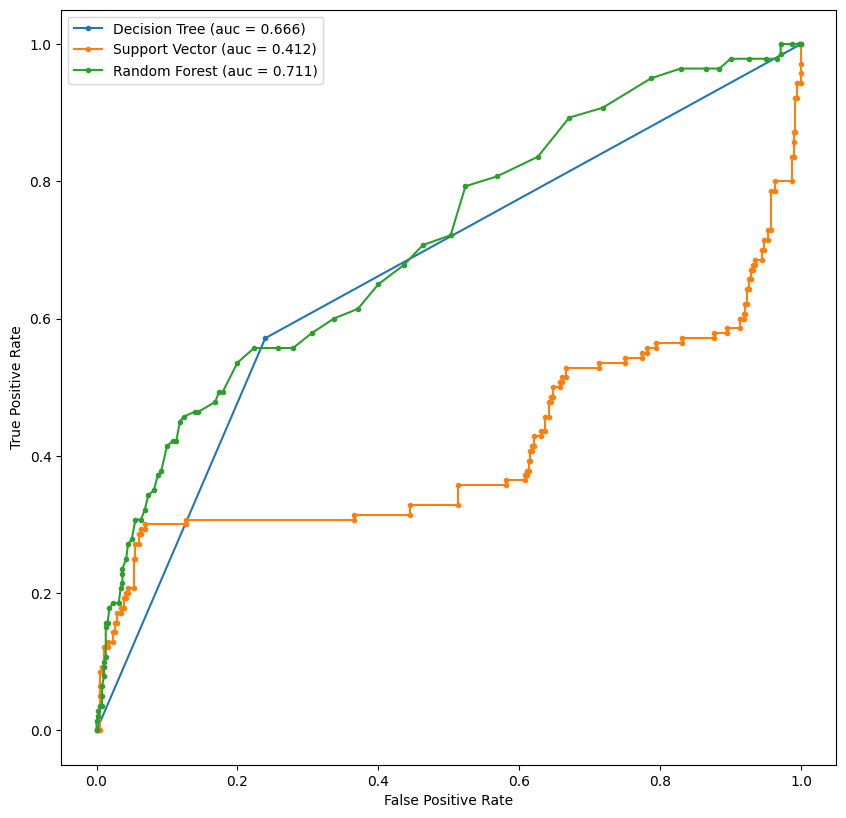

In [ ]:
sars_ModelPredProbTree = classifierTree.predict_proba(x_sars)[::,1]
tree_fpr, tree_tpr, threshold = roc_curve(y_sars, sars_ModelPredProbTree)
auc_tree = auc(tree_fpr, tree_tpr)

sars_ModelPredProbSVC = classifierSVC.predict_proba(x_sars)[::,1]
svc_fpr, svc_tpr, threshold = roc_curve(y_sars, sars_ModelPredProbSVC)
auc_svc = auc(svc_fpr, svc_tpr)

sars_ModelPredProbRF = classifierRandomForest.predict_proba(x_sars)[::,1]
rf_fpr, rf_tpr, threshold = roc_curve(y_sars, sars_ModelPredProbRF)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10, 10), dpi=100)

plt.plot(tree_fpr, tree_tpr, marker=".", label='Decision Tree (auc = %0.3f)' % auc_tree)
plt.plot(svc_fpr, svc_tpr, marker=".", label='Support Vector (auc = %0.3f)' % auc_svc)
plt.plot(rf_fpr, rf_tpr, marker=".", label='Random Forest (auc = %0.3f)' % auc_rf)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()